In [12]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import random  # Import the random module

def generate_image(shape, img_size=64):
    img = np.ones((img_size, img_size, 3)) * 255
    if shape == 'square':
        size = random.randint(10, 30)
        x1, y1 = random.randint(0, img_size - size), random.randint(0, img_size - size)
        x2, y2 = x1 + size, y1 + size
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 0), -1)
        label = [0, 1]
    elif shape == 'circle':
        radius = random.randint(10, 20)
        # Corrected indentation for the following line:
        x, y = random.randint(radius, img_size - radius), random.randint(radius, img_size - radius)
        cv2.circle(img, (x, y), radius, (0, 0, 0), -1)
        x1, y1, x2, y2 = x - radius, y - radius, x + radius, y + radius
        label = [1, 0]
    return img/255.0, label, [x1/img_size, y1/img_size, x2/img_size, y2/img_size]

def generate_dataset(n_samples=1000, img_size=64):
    images, labels, bboxes = [], [], []
    for _ in range(n_samples):
        shape = random.choice(['square', 'circle'])
        img, label, bbox = generate_image(shape, img_size)
        images.append(img)
        labels.append(label)
        bboxes.append(bbox)
    return np.array(images), np.array(labels), np.array(bboxes)

x,y,bboxes=generate_dataset(n_samples=1000)
print("Dataset shape:",x.shape)
print("Labels shape:",y.shape)
print("Bounding boxes shape:",bboxes.shape)

Dataset shape: (1000, 64, 64, 3)
Labels shape: (1000, 2)
Bounding boxes shape: (1000, 4)


Text(0.5, 1.0, 'Label: [0 1] Bounding box:[0.078125 0.078125 0.515625 0.515625]')

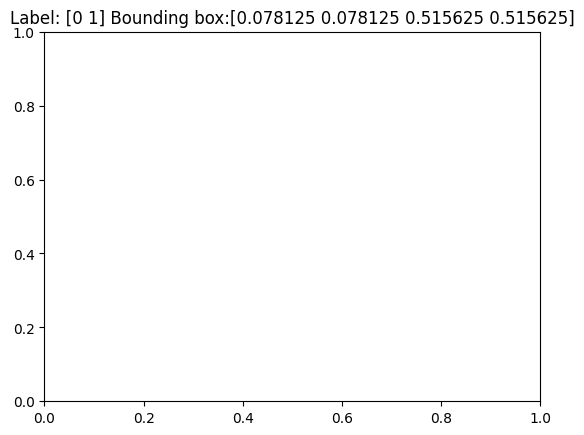

In [14]:
plt.title(f'Label: {y[0]} Bounding box:{bboxes[0]}')